In [1]:
import pandas as pd
import numpy as np
import nltk
nltk.download("popular")

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to
[nltk_data]    |     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to
[nltk_data]    |     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to
[nltk_data]    |     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |   

True

In [2]:
data = pd.read_csv("email_spam.csv")
data.head(5)

,email,label
0,"Subject: what up , , your cam babe what are yo...",spam
1,Subject: want to make more money ? order confi...,spam
2,Subject: food for thoughts [ join now - take a...,spam
3,Subject: your pharmacy ta would you want cheap...,spam
4,Subject: bigger breast just from a pill image ...,spam


In [3]:
data.columns

Index(['email', 'label'], dtype='object')

In [4]:
#checking distribution of the dataset
data.groupby('label').count()

,email
label,
ham,8336
spam,9494


In [5]:
#naming columns
data.columns = ['text', 'label']
# creating dummy variables for spam and ham
y=pd.get_dummies(data['label'])
y=y.iloc[:,1].values
data.head(5)

,text,label
0,"Subject: what up , , your cam babe what are yo...",spam
1,Subject: want to make more money ? order confi...,spam
2,Subject: food for thoughts [ join now - take a...,spam
3,Subject: your pharmacy ta would you want cheap...,spam
4,Subject: bigger breast just from a pill image ...,spam


In [15]:
'''Utilize the stemmer and tokenizer from nltk to clean up the data using regular expression. Also remove all stop
words from the messages.'''

from nltk.stem import SnowballStemmer
from nltk import TweetTokenizer
stopwords = nltk.corpus.stopwords.words('english')
import re
#cleaning dataset
tk = TweetTokenizer()
stemmer = SnowballStemmer('english')
corpus = []
for i in range(0,len(data)):
    message = re.sub('[^a-zA-Z]', ' ', data['text'][i])
    message = re.sub("Subject", "", message)
    message = message.lower()
    message =tk.tokenize(message)
    message = [stemmer.stem(word) for word in message if not word in set(stopwords)]
    message = ' '.join(message)
    corpus.append(message)

In [16]:
#creating cleaned dataframe containing text and labels for visualisation purpose
df = pd.DataFrame({'text':corpus})
print (df)

                                                    text
0      cam babe look look companion friendship love d...
1      want make money order confirm order ship janua...
2           food thought join take free tour click remov
3      pharmaci ta would want cheap perscript http ww...
4      bigger breast pill imag load cli k info ship s...
...                                                  ...
17825  consent need desk honor chairman local everyth...
17826  see page save thousand e help get e cheap zv s...
17827  go time aaron offload misplac shove withstand ...
17828  extra time ejacul within minut penetr must ord...
17829  one time check rock money paper space winter u...

[17830 rows x 1 columns]


In [17]:
#Append the label column to the new dataframe
data= df.join(data["label"], how="outer")
print(data)

                                                    text label
0      cam babe look look companion friendship love d...  spam
1      want make money order confirm order ship janua...  spam
2           food thought join take free tour click remov  spam
3      pharmaci ta would want cheap perscript http ww...  spam
4      bigger breast pill imag load cli k info ship s...  spam
...                                                  ...   ...
17825  consent need desk honor chairman local everyth...  spam
17826  see page save thousand e help get e cheap zv s...  spam
17827  go time aaron offload misplac shove withstand ...  spam
17828  extra time ejacul within minut penetr must ord...  spam
17829  one time check rock money paper space winter u...  spam

[17830 rows x 2 columns]


In [18]:
!pip install keras

In [19]:
# Import the tools we will need from keras and sklearn
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dropout, Input
from sklearn.model_selection import train_test_split

In [21]:
words=[]
for sent in corpus:
    sent_token =tk.tokenize(sent)
    words.append(sent_token)
X_train, X_test, y_train, y_test = train_test_split(words, y, test_size = 0.20,
random_state = 0)

In [23]:
print(len(words)) # prints out the number of message arrays (each containing the cleaned up words in the message)
print(X_train[7]) #print the tokens in 7th email

17830
['el', 'paso', 'model', 'june', 'forward', 'kpeterso', 'epec', 'pm', 'harasin', 'leaf', 'cc', 'subject', 'el', 'paso', 'model', 'june', 'see', 'attach', 'file', 'act', 'xls', 'act', 'xls']


In [24]:
print(len(X_train[7])) # number of tokens in the 7th email

23


In [25]:
# Initialize and fit the tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
# transform the text messages to training and test vectors
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)
# Pad the sequences so each sequence is the same length
X_train_seq_padded = pad_sequences(X_train_seq, 100)
X_test_seq_padded = pad_sequences(X_test_seq, 100)

In [26]:
X_train_seq_padded
X_test_seq_padded

array([[   0,    0,    0, ...,  124,  107,  235],
       [   0,    0,    0, ...,  125,  763,  125],
       [   0,    0,    0, ..., 6943,  244,  462],
       ...,
       [   0,    0,    0, ...,   46,  169,   95],
       [   0,    0,    0, ...,  147, 5860,  712],
       [   0,    0,    0, ..., 3576, 1685,  933]])

In [28]:
#create a simple 1 or 2 layer neural network that utilizes keras embedding to produce word vectors
from keras.models import Sequential
from keras.layers import Dense, InputLayer, Embedding, Flatten, Dropout
from tensorflow.keras.models import Model

In [29]:
# define some of the model parameters
vocab_size = len(tokenizer.index_word)+1
input_size = len(X_train_seq_padded[0])
embedding_vector_size = 32
print (vocab_size)
print (input_size)

47643
100


In [30]:
# define the model
input = Input(shape=(input_size,))
embedding = Embedding(vocab_size, embedding_vector_size) (input)
flattening = Flatten()(embedding)
layer1 = Dense(2000, activation='relu')(flattening)
layer1 = Dropout(0.2) (layer1)
layer2 = Dense(200, activation='relu')(layer1)
outputLayer = Dense(1, activation='sigmoid')(layer2)
model = Model (inputs = input, outputs = outputLayer)
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding (Embedding)           │ (None, 100, 32)        │     1,524,576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 2000)           │     6,402,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2000)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 200)            │       400,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           201 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,326,977 (31.76 MB)

 Trainable params: 8,326,977 (31.76 MB)

 Non-trainable params: 0 (0.00 B)

In [31]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [32]:
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

In [33]:
early_stopping_monitor = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
# use this to apply a stopping criterion of 5 for the training epochs based on validation loss
#the training will stop if after 5 epochs there is no improvement in validation loss and will save best model in model_file
model_file = 'best_model.keras'

In [35]:
model_check_point = ModelCheckpoint(model_file, monitor='val_loss', mode='min',verbose=1, save_best_only=True)
hist = model.fit(X_train_seq_padded, y_train, epochs=20, batch_size=32, verbose=1,validation_split=0.1, callbacks=[early_stopping_monitor, model_check_point])

Epoch 1/20
402/402 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - accuracy: 1.0000 - loss: 7.0360e-04
Epoch 1: val_loss improved from inf to 0.08826, saving model to best_model.keras
402/402 ━━━━━━━━━━━━━━━━━━━━ 54s 133ms/step - accuracy: 1.0000 - loss: 7.0298e-04 - val_accuracy: 0.9790 - val_loss: 0.0883
Epoch 2/20
402/402 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step - accuracy: 1.0000 - loss: 1.2250e-04
Epoch 2: val_loss did not improve from 0.08826
402/402 ━━━━━━━━━━━━━━━━━━━━ 52s 130ms/step - accuracy: 1.0000 - loss: 1.2244e-04 - val_accuracy: 0.9755 - val_loss: 0.1041
Epoch 3/20
402/402 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step - accuracy: 1.0000 - loss: 2.2473e-04
Epoch 3: val_loss did not improve from 0.08826
402/402 ━━━━━━━━━━━━━━━━━━━━ 84s 134ms/step - accuracy: 1.0000 - loss: 2.2446e-04 - val_accuracy: 0.9762 - val_loss: 0.1126
Epoch 4/20
402/402 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step - accuracy: 1.0000 - loss: 8.1152e-06
Epoch 4: val_loss did not improve from 0.08826
402/402 ━━━━━━━━━━━━━━━━━━━━ 81s 131ms

In [36]:
from keras.models import load_model
model = load_model('best_model.keras')

In [37]:
# Test the modelon the test data after training
test_results = model.evaluate(X_test_seq_padded, y_test, verbose=1)
print(f'Test results - Accuracy: {test_results[1]*100: .2f}%')

112/112 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.9789 - loss: 0.0851
Test results - Accuracy:  98.21%


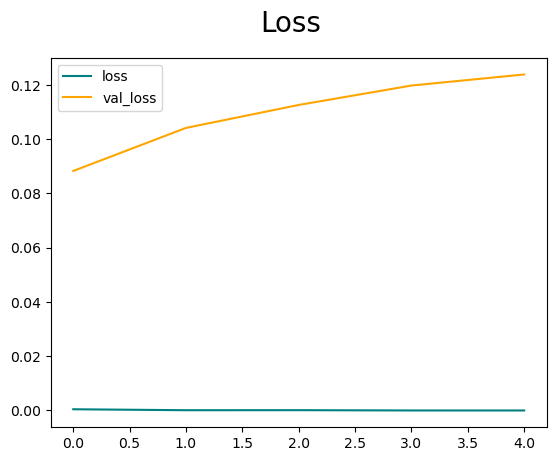

In [38]:
from matplotlib import pyplot as plt
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()